In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner import Plot

def GreatCircle(Start_p,End_p):
    import pyproj
    import numpy as np
    startlong, startlat = Start_p
    endlong, endlat     = End_p
    startlong = startlong-360
    endlong   = endlong-360

    # calculate distance between points
    g = pyproj.Geod(ellps='WGS84')
    (az12, az21, dist) = g.inv(startlong, startlat, endlong, endlat)

    # calculate line string along path with segments <= 1 km
    lonlats = g.npts(startlong, startlat, endlong, endlat,
                    1 + int(dist / 1000))

    lonlats = np.array(lonlats)
    lonlats[:,0] = lonlats[:,0]+360

    return lonlats

In [2]:
OptInfo = {}
X     = [230,360]
Y     = [-80,-40]
d     = [5,2.5]
OptInfo['Start Time']           = '2017-03-15'
OptInfo['End Time']             = '2017-03-16'
OptInfo['WayPoints']            = '../../resources/WayPoint_LongPaths.csv'
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'

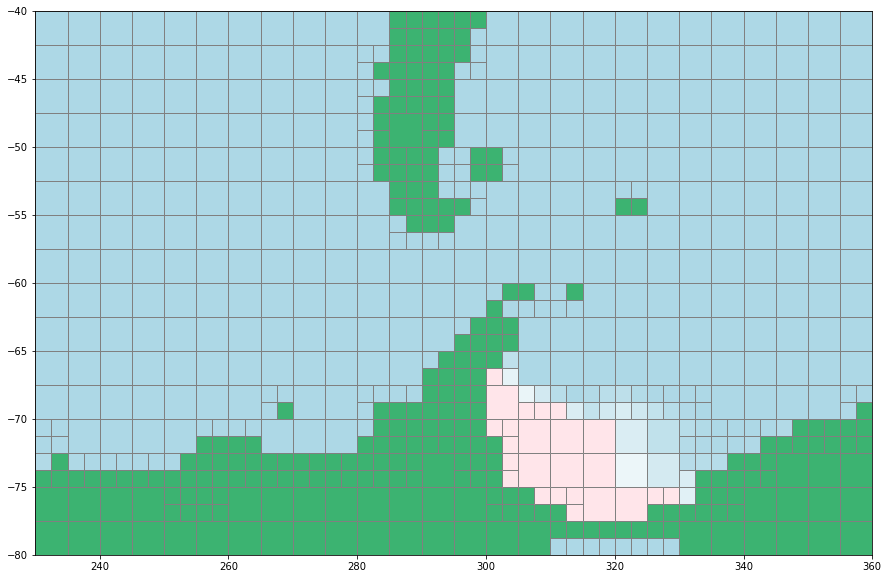

In [3]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(X[0],X[1],Y[0],Y[1],d[0],d[1])
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(1)
Plot.Mesh(cellGrid)

=== Processing Waypoint = LongPathStart ===
=== Processing Waypoint = LongPathEnd ===


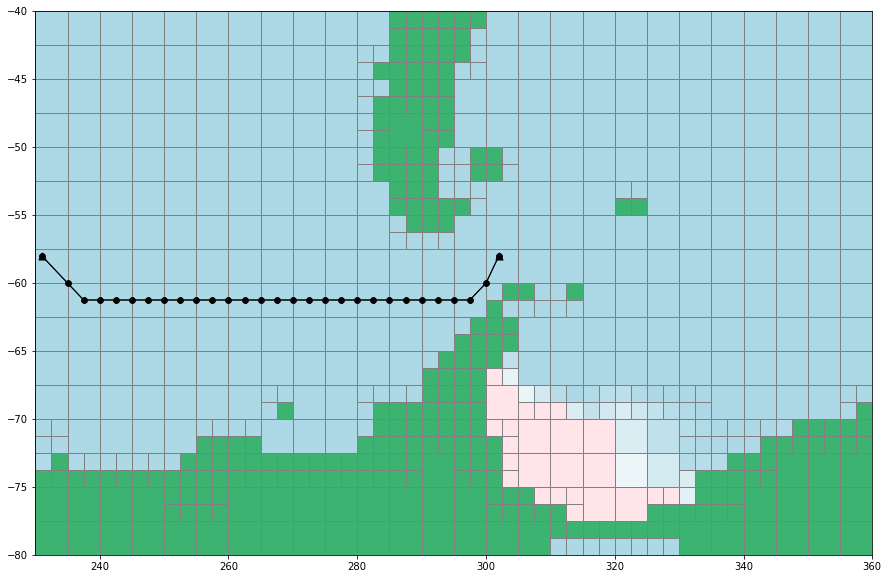

In [4]:
TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(verbrose=True)
Plot.Paths(cellGrid,Paths,routepoints=True,Waypoints=TT.OptInfo['WayPoints'])

In [16]:
SmoothedPaths = TT.PathSmoothing(Paths,maxiter=150)

 PATH: LongPathStart -> LongPathEnd 
 PATH: LongPathEnd -> LongPathStart 


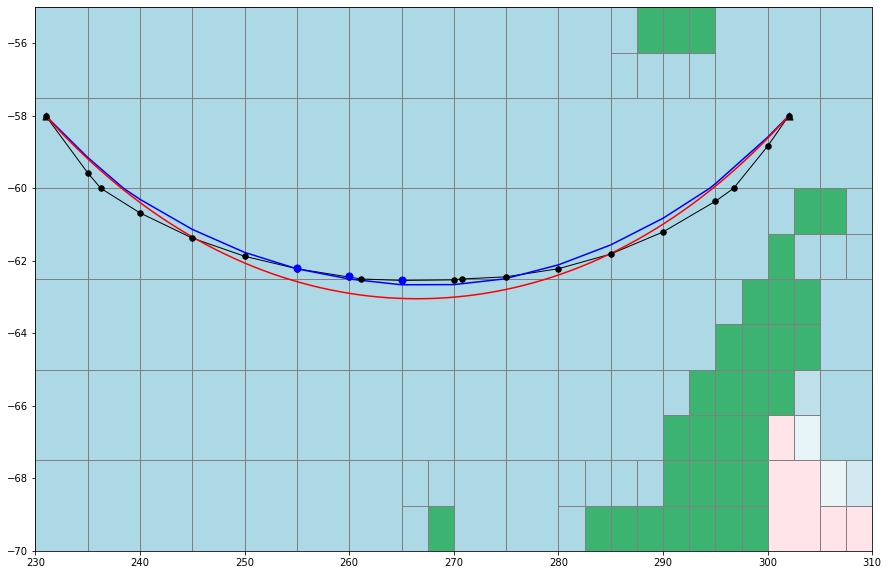

In [17]:
ax = Plot.Paths(cellGrid,[SmoothedPaths[0]],routepoints=True,Waypoints=TT.OptInfo['WayPoints'],return_ax=True)
GT = pd.read_csv('../../resources/GroundTruth_LongPath_End2Start_Smooth.csv')
GT['Long'] = GT['Long'] + 360
ax.plot(GT['Long'],GT['Lat'],'b')
ax.set_ylim([-70,-55])
#ax.set_ylim([-64,-62])
ax.set_xlim([None,310])

pts = TT.OptInfo['WayPoints'][['Long','Lat']].to_numpy()
grc = GreatCircle(pts[0,:],pts[1,:])
ax.plot(grc[:,0],grc[:,1],'r')



Sp=(265.00,-62.53);Cp=(260.00,-62.41);Np=(255.00,-62.21)

ax.scatter(Cp[0],Cp[1],50,'b',zorder=200)
ax.scatter(Sp[0],Sp[1],50,'b',zorder=200)
ax.scatter(Np[0],Np[1],50,'b',zorder=200)


array([[302., -58.],
       [231., -58.]])